<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 선형 회귀
 * 하는 이유 : knn의 한계(주변 len에 대한 wei값이 없다!)

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


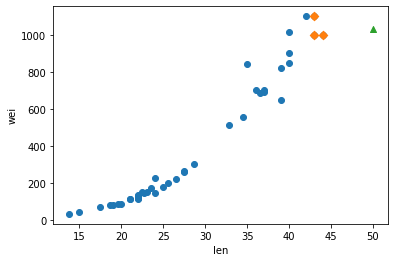

In [ ]:
distances,indexes=knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1033,marker='^')
plt.xlabel('len')
plt.ylabel('wei')
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]])) # 이건 확실히 문제가 있다. 데이터가 한정되어있을 때 데이터를 예측할 수 있는 것이 필요해!

[1033.33333333]


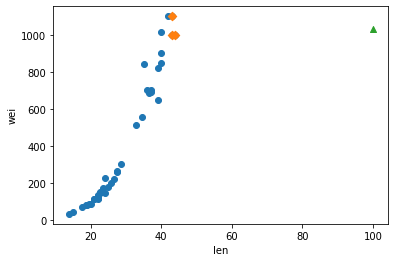

In [ ]:
distances,indexes=knr.kneighbors([[100]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100,1033,marker='^')
plt.xlabel('len')
plt.ylabel('wei')
plt.show()
# 그래프가 심각하군... 최근접으로 하다간 망하겠어
# 머신러닝 모델은 주기적으로 훈련이 필요! 시간과 환경이 변하면서 데이터도 바뀌기 때문에 주기적 업데이트가 필수적으로 된다.

### 선형 회귀
### 밑 그림 참고
 * 결론 : 결정계수가 중요하다
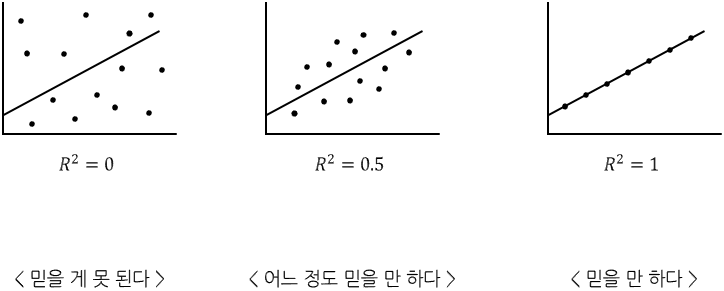

In [ ]:
from sklearn.linear_model import LinearRegression # 선형 회귀
lr=LinearRegression()
lr.fit(train_input,train_target)
print(lr.predict([[50]]))
# 그나마 비슷. 그러나 나는 더 완벽을 추구한다 우오오

[1241.83860323]


In [ ]:
print(lr.coef_,lr.intercept_) # 머신러닝에서 기울기를 종종 계수 혹은 가중치라 한다

[39.01714496] -709.0186449535477


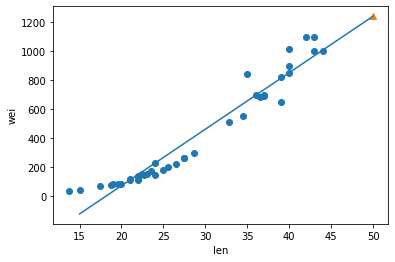

In [ ]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_]) # 1차함수 그래프
plt.scatter(50,1241.8,marker='^') # 예측한 길이 50에 맞는 무게
plt.xlabel('len')
plt.ylabel('wei')
plt.show()
# 어느정도 믿을 만 하다

In [ ]:
# 결정계수 확인
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
# 조금 차이가 나서 해결할 방법을 찾아보니 선을 곡선으로 만들면 되겠구나라는 생각을 함
# 그래서 나온 게 다항 회귀

0.939846333997604
0.8247503123313558


In [ ]:
# 2차방정식 그리려면 길이 제곱한 항이 훈련 세트 추가되어야 함
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

In [ ]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [ ]:
print(lr.coef_,lr.intercept_)
# 무게 = 1.01*길이^2 - 21.6*길이 + 116.05

[  1.01433211 -21.55792498] 116.0502107827827


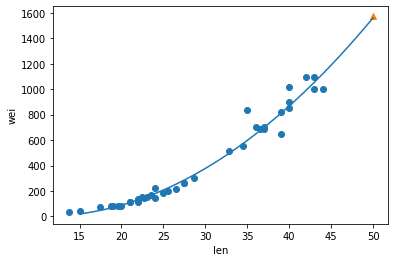

In [ ]:
point=np.arange(15,51)
plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50,1574,marker='^')
plt.xlabel('len')
plt.ylabel('wei')
plt.show()

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


In [ ]:
# 과소,과대적합에 들지도 않고, 훈련케이스와 테스트케이스랑 차이도 0.7%라 별로 차이 안남